In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("C:\\Users\\sanjay\\Documents\\All working files\\data\\Analysis data\\My Uber Drives - 2016.csv")

In [3]:
df.shape

(1156, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df['START_DATE*'].unique()

array(['1/1/2016 21:11', '1/2/2016 1:25', '1/2/2016 20:25', ...,
       '12/31/2016 21:32', '12/31/2016 22:08', 'Totals'], dtype=object)

In [3]:
df = df[df['START_DATE*'] != 'Totals']

In [4]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])

In [5]:
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

In [9]:
px.bar(x=df['CATEGORY*'].value_counts().index,
       y=df['CATEGORY*'].value_counts().values,height=400,width=500,text_auto=True)
# most of the booking are for business

In [6]:
df.columns = df.columns.str.replace("*","")

In [7]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [12]:
df.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [8]:
df['PURPOSE'] = df['PURPOSE'].fillna(method = 'ffill')

C:\Users\sanjay\AppData\Local\Temp\ipykernel_12996\1660089832.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PURPOSE'] = df['PURPOSE'].fillna(method = 'ffill')


In [14]:
px.bar(x=df['PURPOSE'].value_counts().index,
       y=df['PURPOSE'].value_counts().values,height=400,width=500,text_auto=True)
# most of people have used uber for meeting and entertainement also there is a person who used uber of charity

In [9]:
df['START'].value_counts().sort_values(ascending=False).head(10)

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

In [106]:

px.bar(x=df['START'].value_counts().sort_values(ascending=False).head(10).index,
       y=df['START'].value_counts().sort_values(ascending=False).head(10).values,height=400,width=500,text_auto=True)
# top 10 places where most of the journey started

In [105]:
px.bar(x=df['STOP'].value_counts().sort_values(ascending=False).head(10).index,
       y=df['STOP'].value_counts().sort_values(ascending=False).head(10).values,height=400,width=500,text_auto=True)

# top 10 places where journey ends, Cary is most frequent start and stop location

In [10]:
def journey_type(x):
    if x['START'] == x['STOP']:
        return "return jouney"
    else:
        return "single journey"

In [11]:
df["journey_type"] = df.apply(journey_type,axis=1)

In [12]:
df['journey_type'].value_counts()

journey_type
single journey    867
return jouney     288
Name: count, dtype: int64

In [13]:
px.pie(names=df['journey_type'].value_counts().index,
       values=df['journey_type'].value_counts().values,height=400,width=500)
# around 25 % journey are retuned journey

In [22]:
df['MILES'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64

(array([1.104e+03, 2.600e+01, 8.000e+00, 4.000e+00, 4.000e+00, 4.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.5 ,  31.48,  62.46,  93.44, 124.42, 155.4 , 186.38, 217.36,
        248.34, 279.32, 310.3 ]),
 <BarContainer object of 10 artists>)

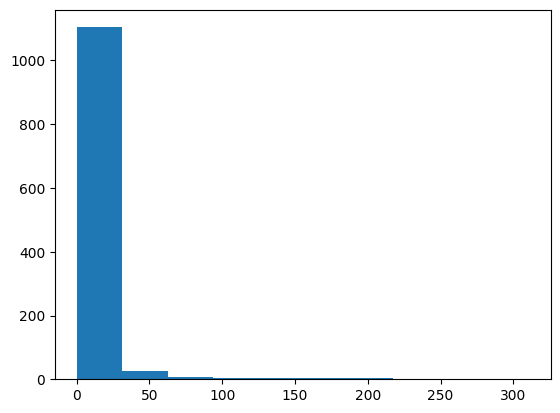

In [23]:
plt.hist(df['MILES'])

In [25]:
px.box(data_frame=df,y='MILES',color='PURPOSE')
#people who are using uber for entertainment, supplies or for office they not going more than 50 miles

In [27]:
df.groupby('PURPOSE')['MILES'].mean()

PURPOSE
Airport/Travel      14.953704
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      16.065806
Errand/Supplies      5.928902
Meal/Entertain       5.773878
Meeting             12.652597
Moving               4.550000
Temporary Site      11.016327
Name: MILES, dtype: float64

In [28]:
px.bar(x=df.groupby('PURPOSE')['MILES'].mean().index,
       y=df.groupby('PURPOSE')['MILES'].mean().values,height=400,width=500,text_auto=True)

In [60]:
pd.DataFrame({'Min': df.groupby(['PURPOSE'])['MILES'].min(),
             'Mean': df.groupby(['PURPOSE'])['MILES'].mean(),
             'Max': df.groupby(['PURPOSE'])['MILES'].max()})

,Min,Mean,Max
PURPOSE,,,
Airport/Travel,0.9,14.953704,156.9
Between Offices,1.9,10.944444,39.2
Charity ($),15.1,15.100000,15.1
Commute,180.2,180.200000,180.2
Customer Visit,0.6,16.065806,310.3
Errand/Supplies,0.5,5.928902,195.3
Meal/Entertain,0.6,5.773878,36.5
Meeting,0.7,12.652597,201.0
Moving,3.3,4.550000,6.1


In [14]:
a = df['END_DATE'] - df['START_DATE']

In [15]:
df["MINUTES"] = a.dt.total_seconds()/60

<Axes: xlabel='MINUTES', ylabel='MILES'>

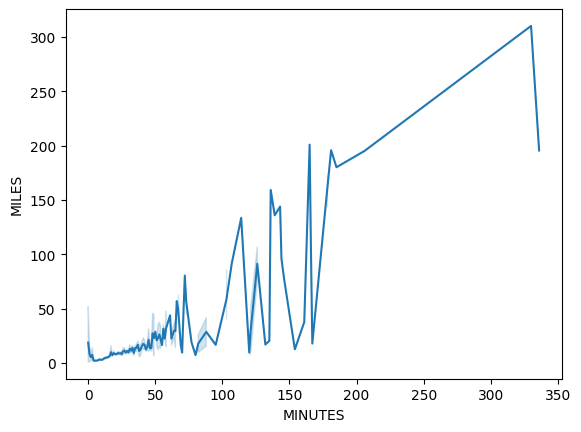

In [16]:
sns.lineplot(data=df,x='MINUTES',y='MILES')

<Axes: xlabel='MILES', ylabel='MINUTES'>

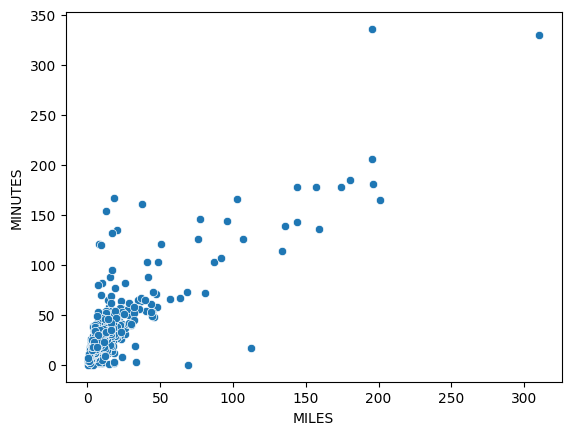

In [64]:
sns.scatterplot(data=df,x='MILES',y='MINUTES')

In [17]:
df['MONTH'] = df['START_DATE'].dt.month_name()

In [18]:
df['MONTH'].value_counts()

MONTH
December     146
August       133
November     122
February     115
March        113
July         112
June         108
October      106
January       61
April         54
May           49
September     36
Name: count, dtype: int64

In [81]:
px.bar(x=df['MONTH'].value_counts().index,
       y=df['MONTH'].value_counts().values,height=400,width=700,text_auto=True)
#December have most bookings - indicates Christmas festival

In [19]:
df['QUARTER'] = df['START_DATE'].dt.quarter

In [20]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,journey_type,MINUTES,MONTH,QUARTER
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,return jouney,6.0,January,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,return jouney,12.0,January,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,return jouney,13.0,January,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,return jouney,14.0,January,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,single journey,67.0,January,1


In [21]:
df['QUARTER'].value_counts()

QUARTER
4    374
1    289
3    281
2    211
Name: count, dtype: int64

In [78]:
px.bar(x=df['QUARTER'].value_counts().index,
       y=df['QUARTER'].value_counts().values,height=400,width=500,text_auto=True)

In [84]:
df.groupby('journey_type')[['MILES','MINUTES']].mean()

,MILES,MINUTES
journey_type,,
return jouney,7.742361,20.902778
single journey,11.505075,24.020761


In [87]:
px.histogram(df, x="PURPOSE", color="CATEGORY",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["red","yellow"])
#Charity, commute and moving are only personal trips, Between offices and airport is totally business trips

In [88]:
df['MINUTES'].mean()

23.243290043290042

In [89]:
df['MILES'].mean()

10.566839826839827

In [ ]:
sns.countplot()

In [96]:
df['DAY'] = df['START_DATE'].dt.day_name()

In [98]:
df['DAY'].value_counts()

DAY
Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64

In [99]:
px.bar(x=df['DAY'].value_counts().index,
       y=df['DAY'].value_counts().values,height=400,width=500,text_auto=True)

In [109]:
df.groupby(['START','STOP']).size().sort_values(ascending=False).head(10)

START             STOP            
Unknown Location  Unknown Location    86
Morrisville       Cary                75
Cary              Morrisville         67
                  Cary                53
                  Durham              36
Durham            Cary                32
Islamabad         Unknown Location    28
Unknown Location  Islamabad           28
Lahore            Lahore              27
Islamabad         Islamabad           25
dtype: int64

In [52]:
df['START_DATE'].dt.hour

0       21
1        1
2       20
3       17
4       14
        ..
1150     1
1151    13
1152    15
1153    21
1154    22
Name: START_DATE, Length: 1155, dtype: int32

In [57]:
def categorize_time(t):
    if t>=7 and t<19:
        return "day"
    else:
        return "night"
    

In [58]:
categorize_time(15)

'day'

In [61]:
df['day_or_night'] = df['START_DATE'].dt.hour.apply(categorize_time)

In [64]:
df['day_or_night'].value_counts()

day_or_night
day      871
night    284
Name: count, dtype: int64

In [65]:
px.bar(x=df['day_or_night'].value_counts().index,
       y=df['day_or_night'].value_counts().values,height=400,width=500,text_auto=True)